## Name- Ranjan Pratap Singh                                                      DS2307

# ----------------------Project1- Red Wine Quality Prediction Project--------------------

##### Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pickle

### Importing Dataset

In [2]:
df = pd.read_csv('C://Users//RANJAN//OneDrive//Desktop//winequality-red.csv')

### Exploratory Data Analysis(EDA)  ----->

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.shape

(1599, 12)

#### Our dataset  wine quality of shape (1600 rows , 12 columns) .  It tells about  wine quality based on various parameters given. Quality is our target variable . Our data set consist of all numerical values and our target variable consist of categorical values i.e.(3,8) so it is a  classification problem i.e. we will use claffication models to train, test and predict  the data.

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Here we observe our datatypes . 
We observe that all our features have datatype -'float64' and our target variable consist datatype -'int64'  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### We can see that there is no null values but to check it further of the possibility of white sapces  so  we will  check it little later in this model

##### ---->checking for duplicated values

In [7]:
df.duplicated().sum()

240

---> we found that in our dataset there is 240 duplicated values so we will remove the duplicated values as it can caused biasedness,skewedness,etc in our model 

In [8]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True , inplace=True)

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df.duplicated().sum()

0

##### we removed the duplicated values from the model  now we will check for white spaces in our model

In [11]:
#  checking the values counts pf each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0     53
17.0

#### after checking the value_counts we can be sure that there is not missing values i.e. null values.

In [12]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In description we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see except for total sulphur dioxide all the data have almost same so most of the data is normally distributed

if we see for outliers we can observe that except for ednsity , pH , alcohol all the data has too much difference in 75% and max so there are a significant amount of outliers present in data

### Data Visualization --->

-- Univariate Analysis

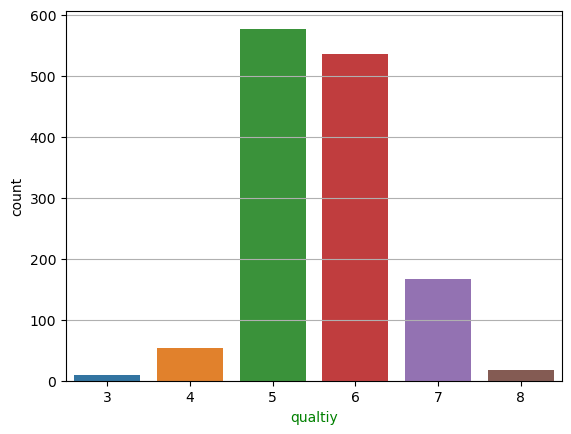

In [13]:
sns.countplot(x='quality' , data = df)
plt.xlabel('qualtiy',color = 'g')
plt.grid(axis ='y')
plt.show()

In [14]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

#### in quality feature we can see most of wine has quality of 5 and 6 i.e not good quality 

In [15]:
df1 = df.drop(['quality'], axis=1)


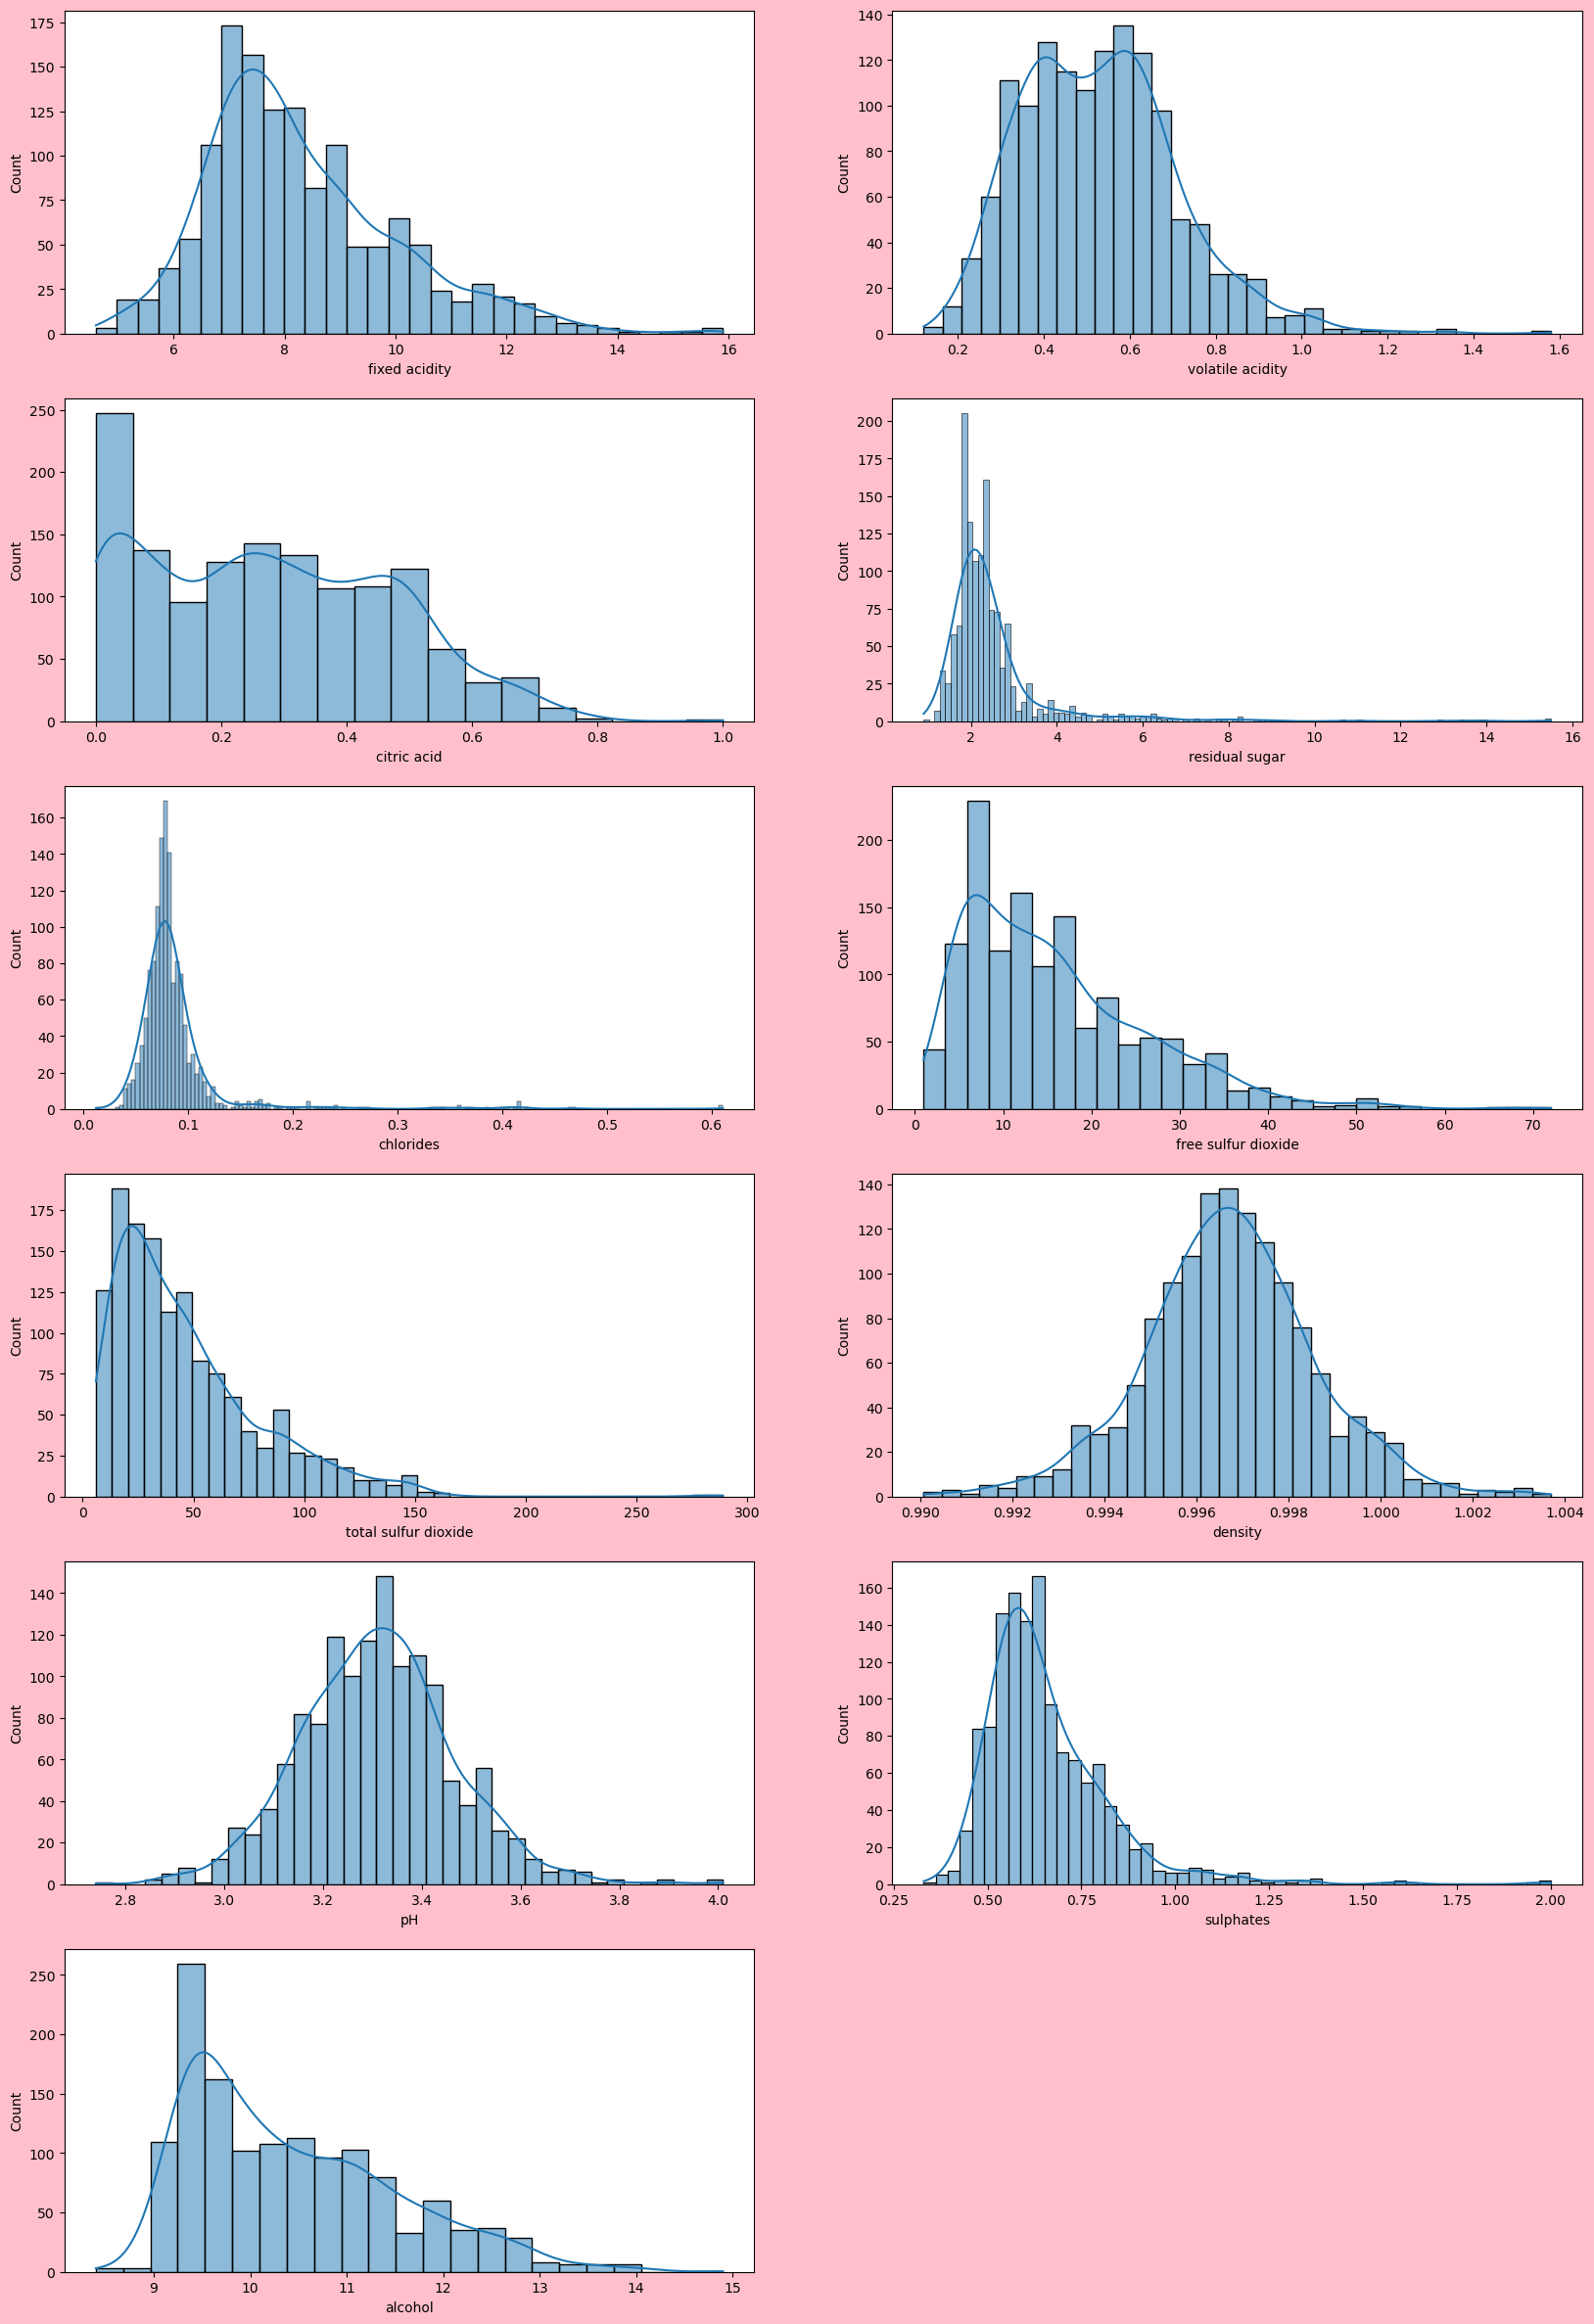

In [16]:
plt.figure(figsize=(20, 30), facecolor="pink")
plotnumber = 1

for i in df1: 
    if plotnumber <= 11:
        ax = plt.subplot(6, 2, plotnumber)
        sns.histplot(df1[i], kde=True)
        plt.xlabel(i, fontsize=10)
    plotnumber += 1

plt.show()

 #### fixed_acidity column,total_sulphur_oxide,free_sulphur_oxide,chlorides, sulphates,alcohal data are little rightly skewed.
 #### volatile_acidity data,density , pH  approixmately have normal distribution .
#### In citric_acid we can see there are less values that dropped more as soon as content in  citric acid increases

##### we will further remove outliers and skewness later in this project to build our model better 

-- bivariate analysis

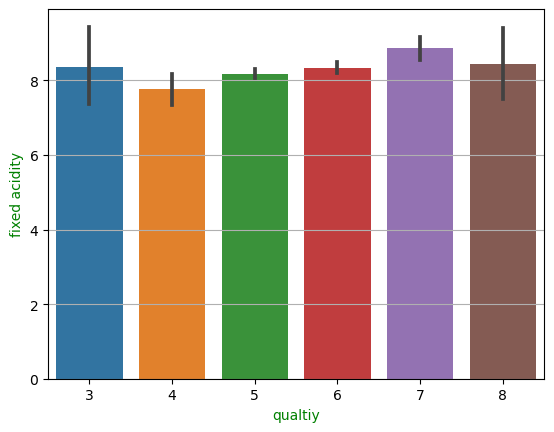

In [17]:
sns.barplot(x ='quality', y='fixed acidity', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('fixed acidity', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot there may not be seeing any direct relationship between fixed_acidity and quality 

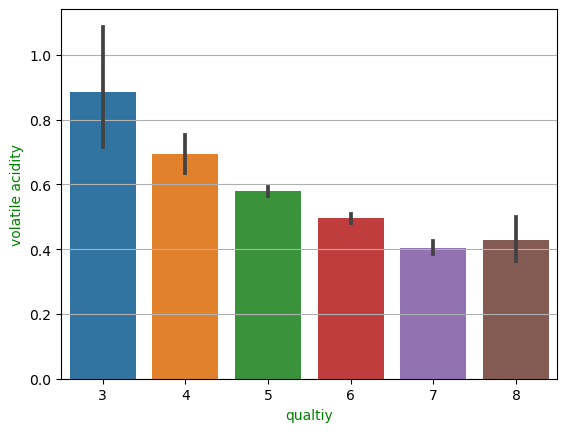

In [18]:
sns.barplot(x ='quality', y='volatile acidity', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('volatile acidity', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot we can analyze that as volatile_acidity goes down wine quality imporves

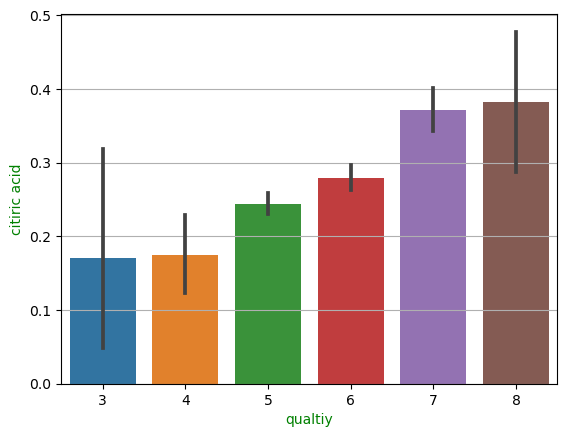

In [19]:
sns.barplot(x ='quality', y='citric acid', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('citiric acid', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot we can analyze that as citric_acid goes up wine quality goes down

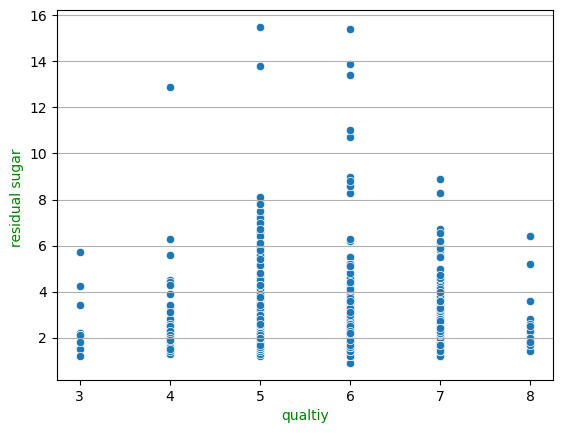

In [20]:
sns.scatterplot(x ='quality', y='residual sugar', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('residual sugar ', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per scatterplot we can not see any significance in this graph 

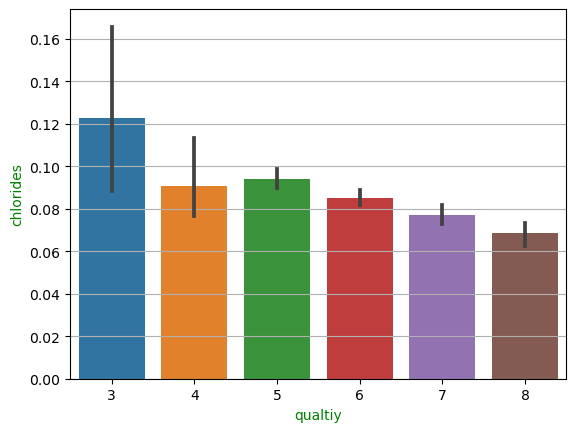

In [21]:
sns.barplot(x ='quality', y='chlorides', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('chlorides', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot we can analyze that as chlorides goes down wine quality imporves

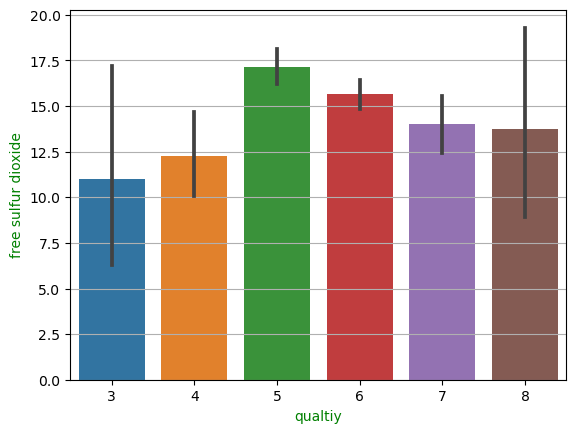

In [22]:
sns.barplot(x ='quality', y='free sulfur dioxide', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('free sulfur dioxide', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot there may not be seeing any direct relationship between free_sulphur_dioxide and quality 

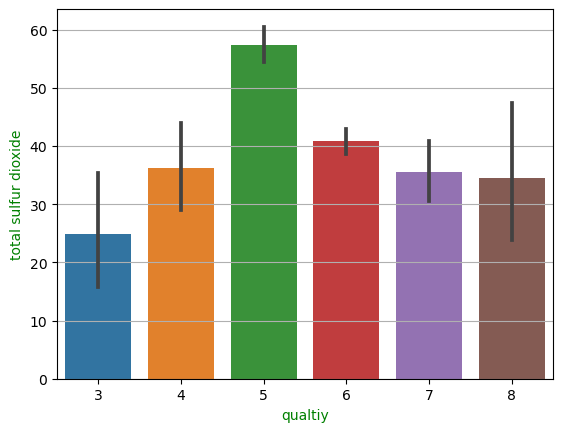

In [23]:
sns.barplot(x ='quality', y='total sulfur dioxide', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('total sulfur dioxide', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot there may not be seeing any direct relationship between total_sulphur_dioxide and quality 

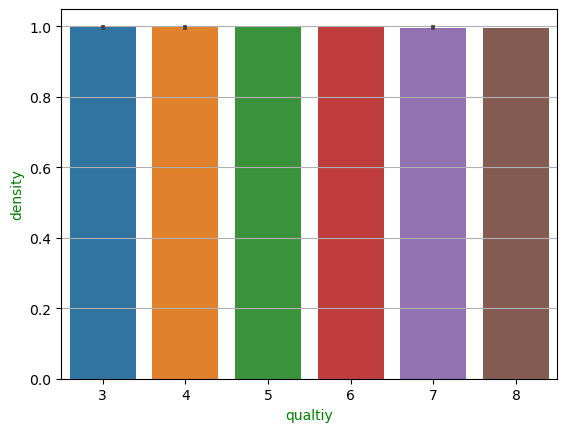

In [24]:
sns.barplot(x ='quality', y='density', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('density', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot there may not be seeing any direct relationship between density and quality 

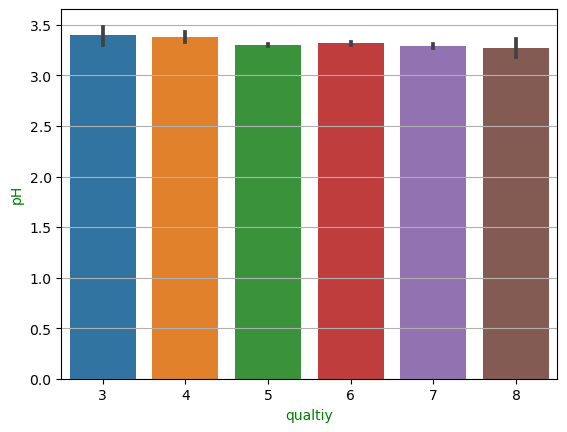

In [25]:
sns.barplot(x ='quality', y='pH', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('pH', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot we can analyze that as pH goes down  wine quality goes down but this is relatively  minimal 

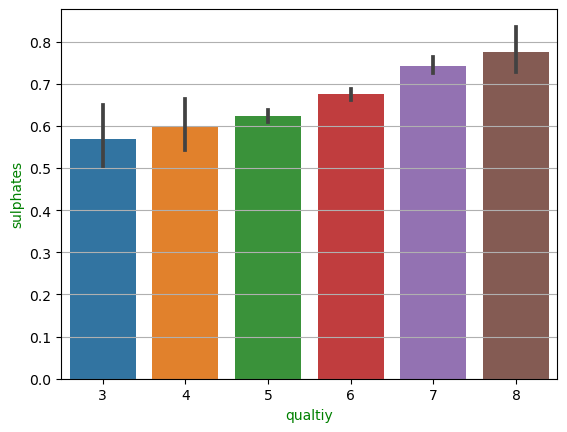

In [26]:
sns.barplot(x ='quality', y='sulphates', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('sulphates', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot we can analyze that as sulphates goes up  wine quality goes up too 

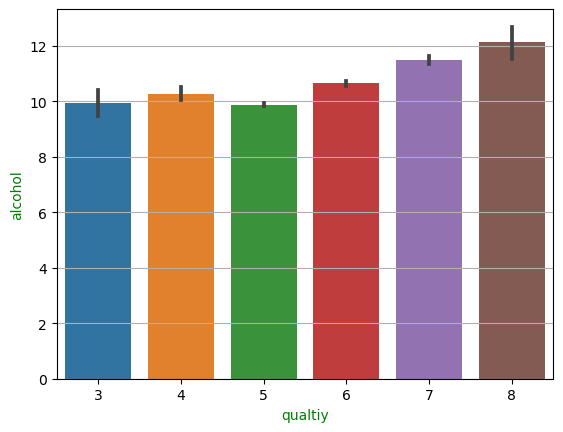

In [27]:
sns.barplot(x ='quality', y='alcohol', data = df)
plt.xlabel('qualtiy',color = 'g')
plt.ylabel('alcohol', color = 'g')
plt.grid(axis ='y')
plt.show()

#### as per barplot we can analyze that as alcohol goes up  wine quality goes up  al little too 

### -- Checking for Outliers

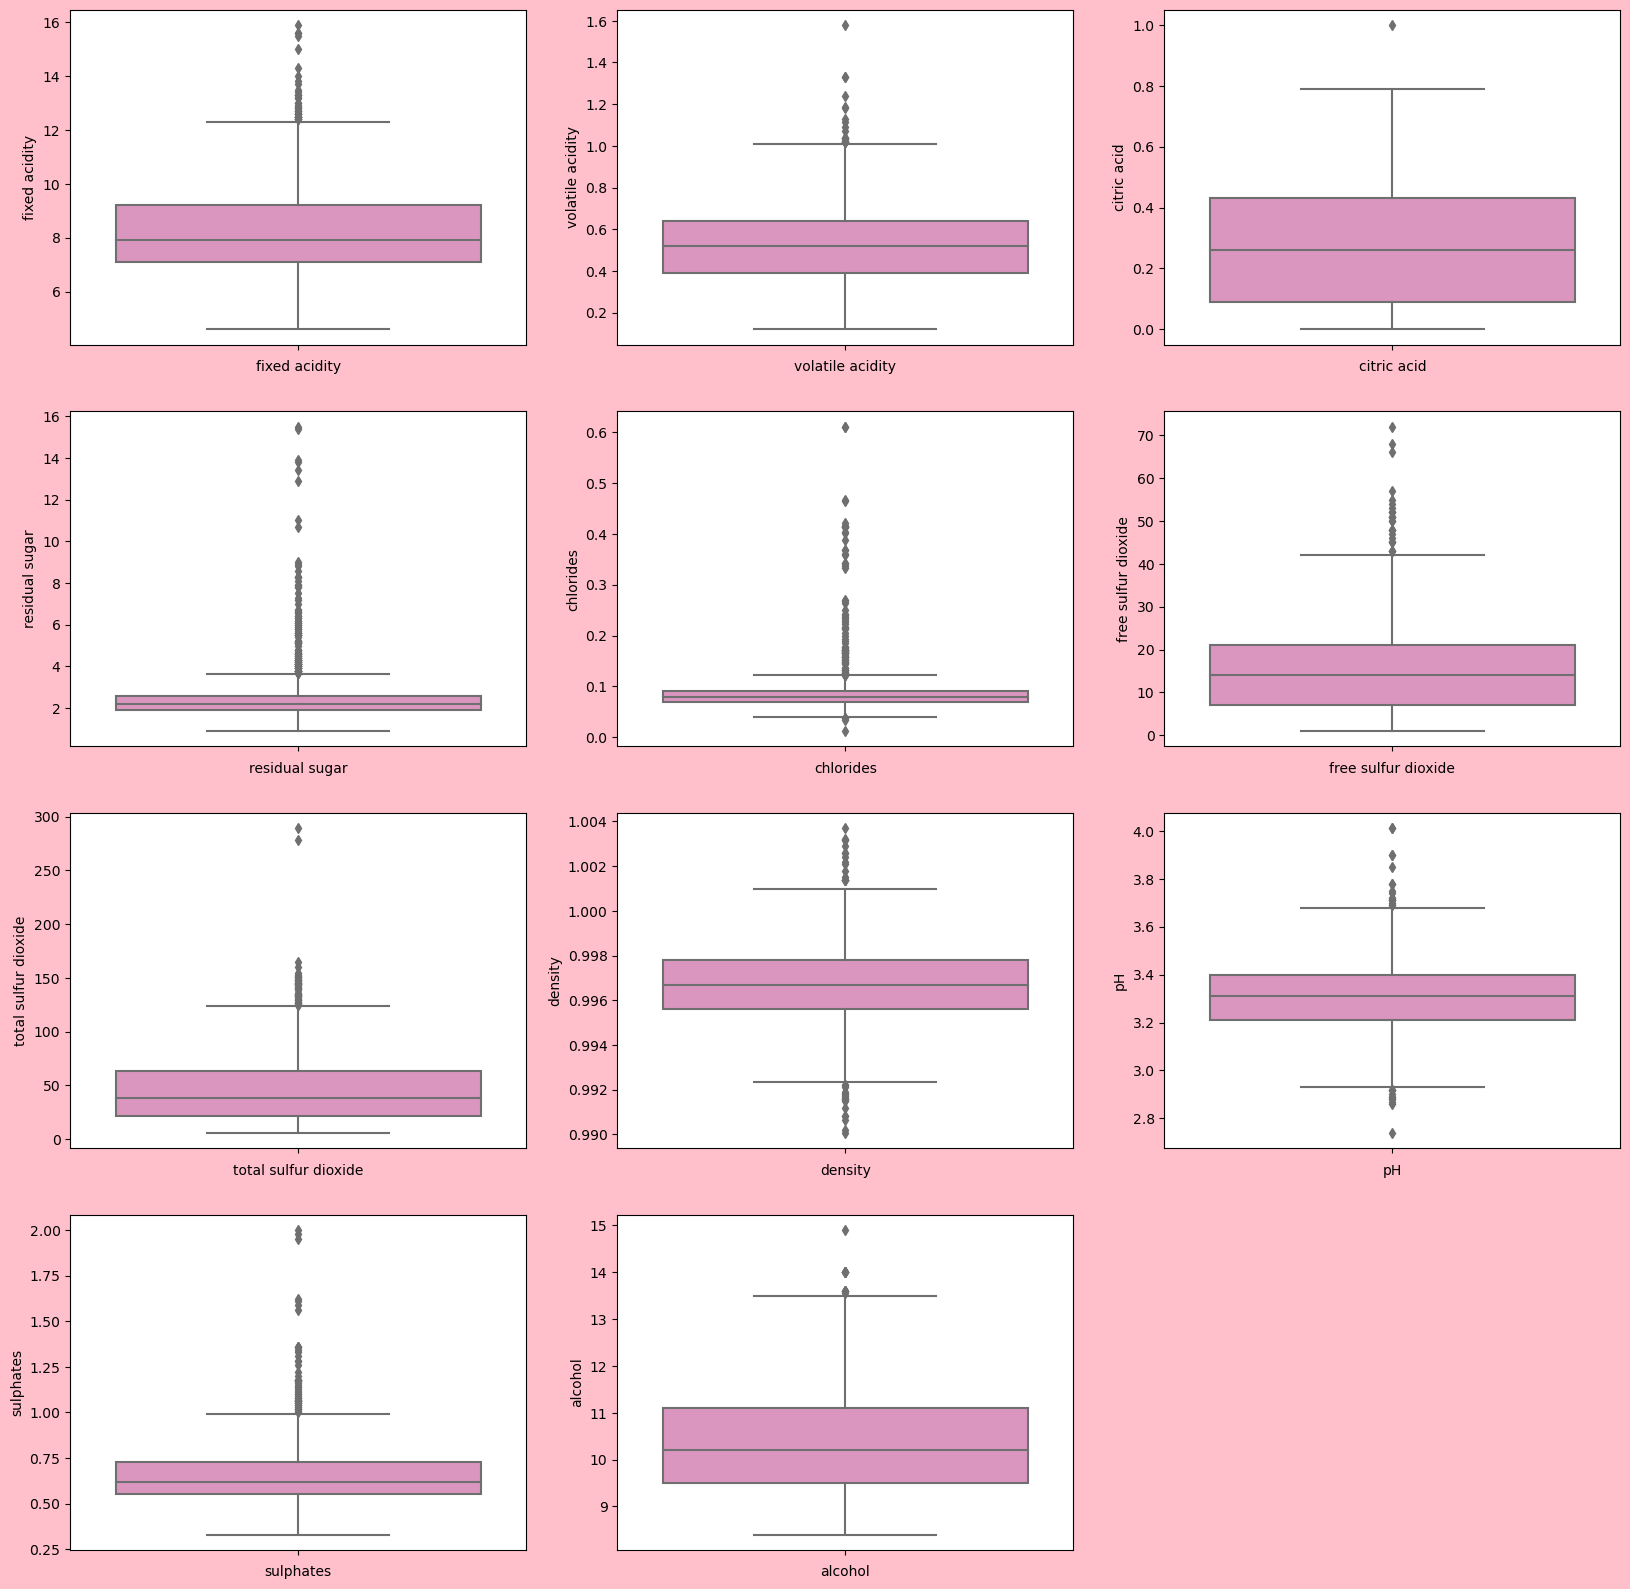

In [28]:
plt.figure(figsize=(20, 20), facecolor="pink")
plotnumber = 1

for column in df1:  
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot( y = df1[column] , palette = 'Set2_r')
        plt.xlabel(column)
    plotnumber += 1

plt.show()

##### we can see that  there are outliers in all the data . now we will try to remove the outliers 

by using Interquartile range

In [29]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df2 = df[~((df < (Q1-1.5*IQR)) |(df> (Q3 + 1.5*IQR))).any(axis=1)]

In [30]:
print('percentage of dataloss',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

percentage of dataloss 25.01839587932303


the data loss is IQR method is 25% that is too much so we will check another method i.e. z-score 

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.524431,0.932000,1.393258,0.461157,0.245623,0.468554,0.384050,0.584003,1.291872,0.578561,0.954374
1,0.294063,1.915800,1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,0.708395,0.124822,0.584575
2,0.294063,1.259934,1.188617,0.165259,0.078535,0.085537,0.214813,0.155790,0.321247,0.051024,0.584575
3,1.664067,1.363534,1.471711,0.461157,0.265883,0.105971,0.394471,0.691057,0.966495,0.461331,0.584575
4,0.524431,0.713378,1.393258,0.535132,0.265883,0.277045,0.204391,0.584003,1.291872,0.578561,0.954374
...,...,...,...,...,...,...,...,...,...,...,...
1354,0.869983,0.494756,0.983977,0.461157,0.407702,1.159265,0.264277,0.106490,0.711149,0.945435,0.861924
1355,1.215536,0.385444,0.983977,0.387183,0.038015,1.542281,0.084619,0.968269,0.904724,0.461331,0.062574
1356,1.388312,0.112167,0.881656,0.239233,0.529261,2.212559,0.124983,0.850510,1.356397,0.593744,0.709723
1357,1.388312,0.631395,0.779336,0.387183,0.265883,1.542281,0.084619,0.663167,1.679021,0.300667,0.214775


In [32]:
np.where(z>3)

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
          41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
          99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
         150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
         252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
         363,  385,  385,  393,  408,  420,  420,  433,  448,  473,  483,
         483,  485,  485,  492,  506,  510,  513,  516,  528,  534,  555,
         562,  562,  564,  565,  565,  565,  582,  582,  592,  597,  599,
         602,  626,  627,  632,  652,  671,  672,  687,  710,  722,  764,
         764,  781,  786,  791,  792,  838,  866,  888,  895,  895,  912,
         918,  918,  920,  920,  945,  948,  963,  985,  994, 1003, 1013,
        1049, 1052, 1060, 1060, 1060, 1073, 1081, 1081, 1082, 1082, 1103,
        1106, 1107, 1117, 1121, 1123, 1123, 1125, 1151, 1159, 1162, 1165,
        1216, 1216, 1216, 1250, 1250, 

In [33]:
df3= df[(z<3).all(axis=1)]

In [34]:
df3.shape

(1239, 12)

In [35]:
print('percentage of dataloss',((df.shape[0]-df3.shape[0])/df.shape[0])*100)

percentage of dataloss 8.830022075055188


#### herein z-score data loss is 9%(approx) , as there is so much outliers in our data we accept it and further proceeds 

In [36]:
df=df3

### -- Checking for Skewness

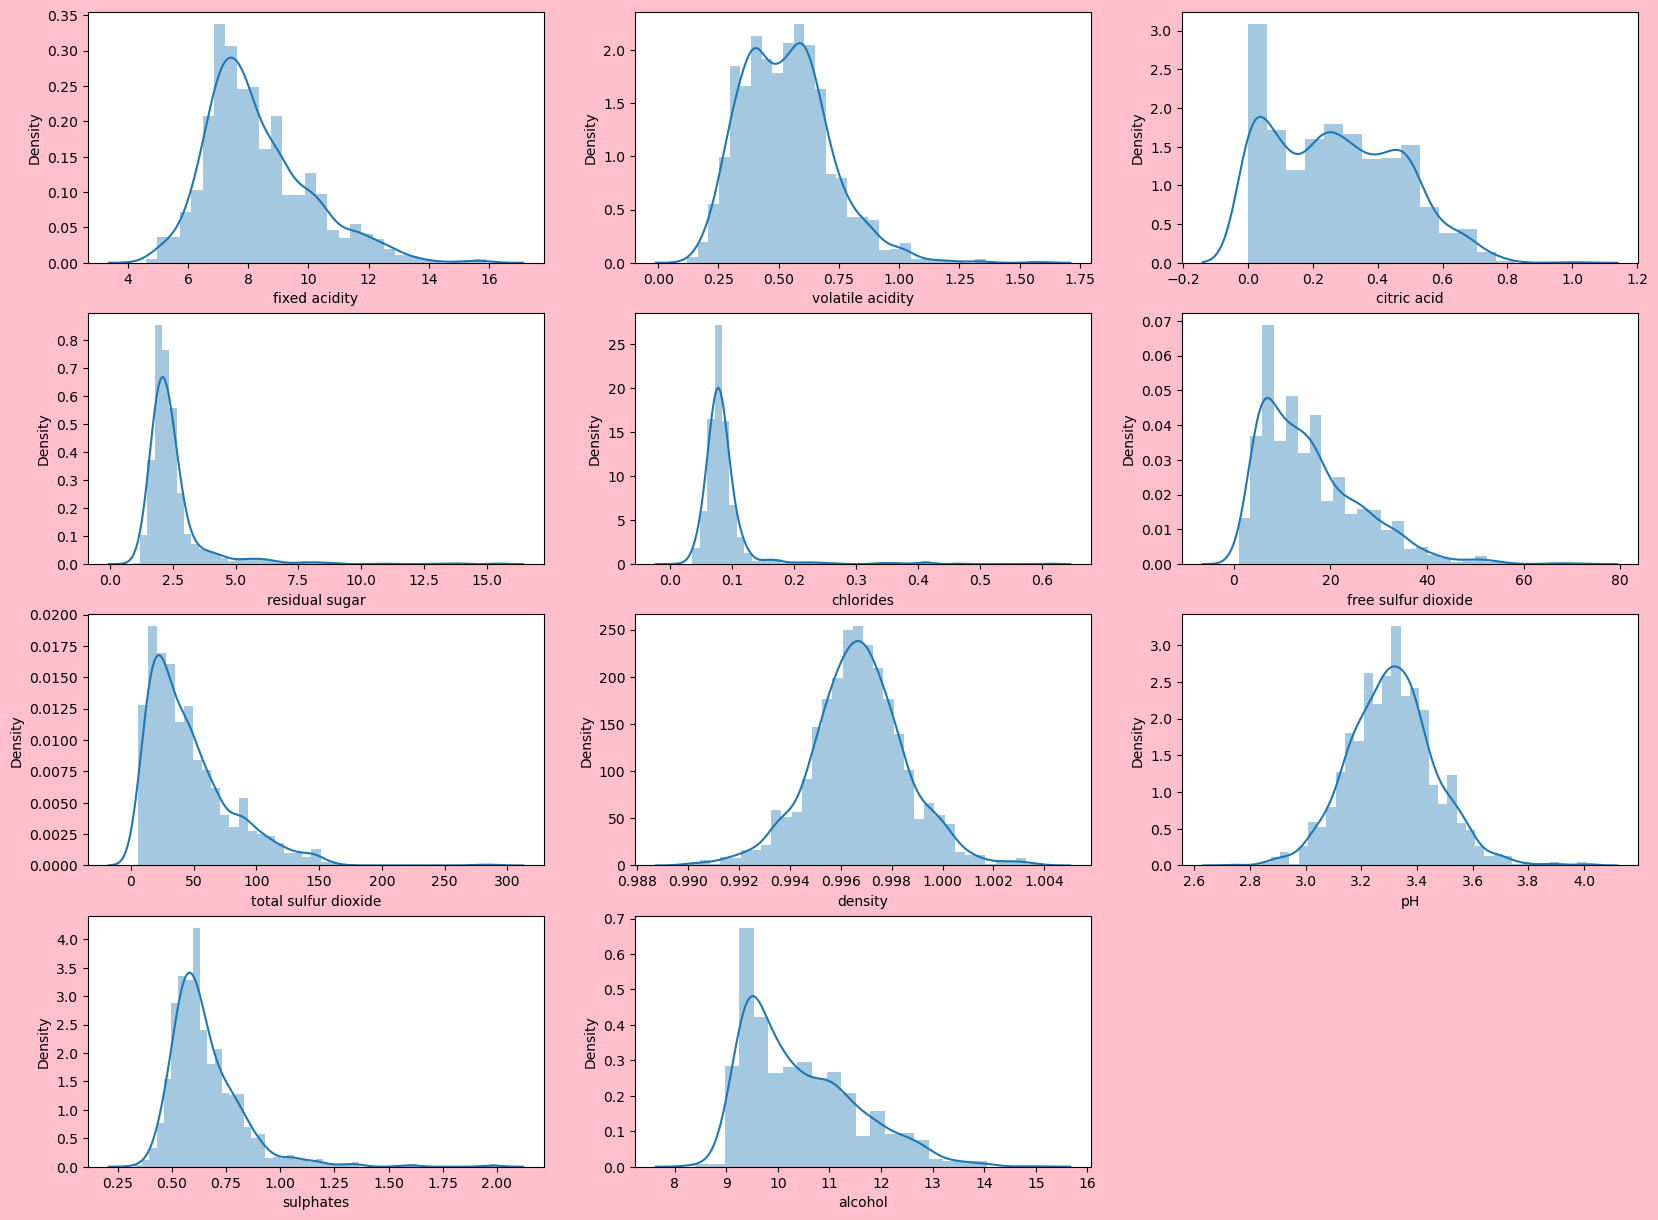

In [37]:
plt.figure(figsize=(20, 15), facecolor="pink")
plotnumber = 1

for i in df1:  # Assuming numerical_col is a list of numerical column names
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df1[i])
        plt.xlabel(i, fontsize=10)
    plotnumber += 1

plt.show()

In [38]:
df.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          2.371572
chlorides               2.480193
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

#### after checking the  graphs and data we see that there is highly skewness present in residual_sugar, chlorides and total_sulphur_dioxide 
we will use methods like cuberoot(cbrt),squareroot(sqrt),log as all data is rightly skewed 

In [39]:
df['residual sugar']=np.cbrt(df['residual sugar'])

In [40]:
df.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.530428
chlorides               2.480193
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

as we can see skewness of resudual suagar come down but not what we want so we use methods till we get results 

In [41]:
df['chlorides']=np.sqrt(df['chlorides'])

In [42]:
df.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.530428
chlorides               1.491853
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

as we can see skewness of chlorides come down but not what we want so we use methods till we get results 

In [43]:
df['residual sugar']=np.log(df['residual sugar'])

In [44]:
df.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.132089
chlorides               1.491853
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

In [45]:
df['residual sugar']=np.sqrt(df['residual sugar'])

In [46]:
df.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          0.475863
chlorides               1.491853
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

In [47]:
df['total sulfur dioxide']=np.sqrt(df['total sulfur dioxide'])

In [48]:
df.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          0.475863
chlorides               1.491853
free sulfur dioxide     0.867795
total sulfur dioxide    0.545618
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

we see the skewness of total_sulphur_dioxide coems down to desired level

In [49]:
df.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          0.475863
chlorides               1.491853
free sulfur dioxide     0.867795
total sulfur dioxide    0.545618
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

In [50]:
df['chlorides']=np.cbrt(df['chlorides'])

In [51]:
df.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          0.475863
chlorides               0.907856
free sulfur dioxide     0.867795
total sulfur dioxide    0.545618
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

#### now we can see there is no feature that is highly skewed and we can further confirm from the graphs given below  but some are moderately skewed but we already use many used many methods tobring down skewness so we will go furhter with moderately skewness

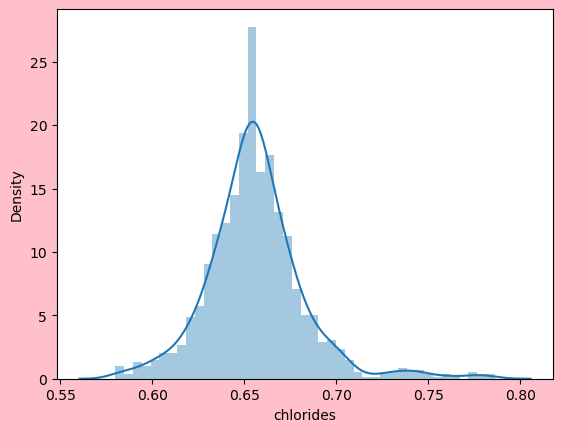

In [52]:
plt.figure(facecolor="pink")
sns.distplot(df['chlorides'])
plt.show()

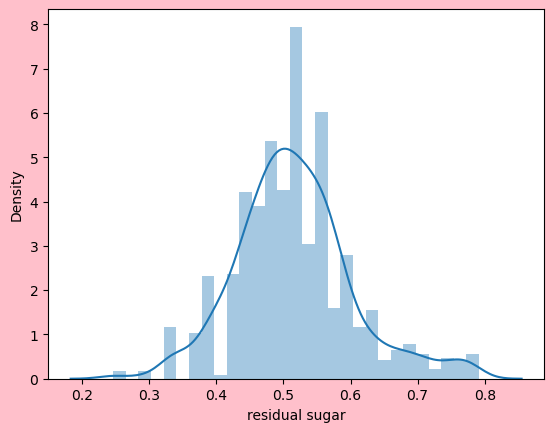

In [53]:
plt.figure(facecolor="pink")
sns.distplot(df['residual sugar'])
plt.show()

### checking for correlation 

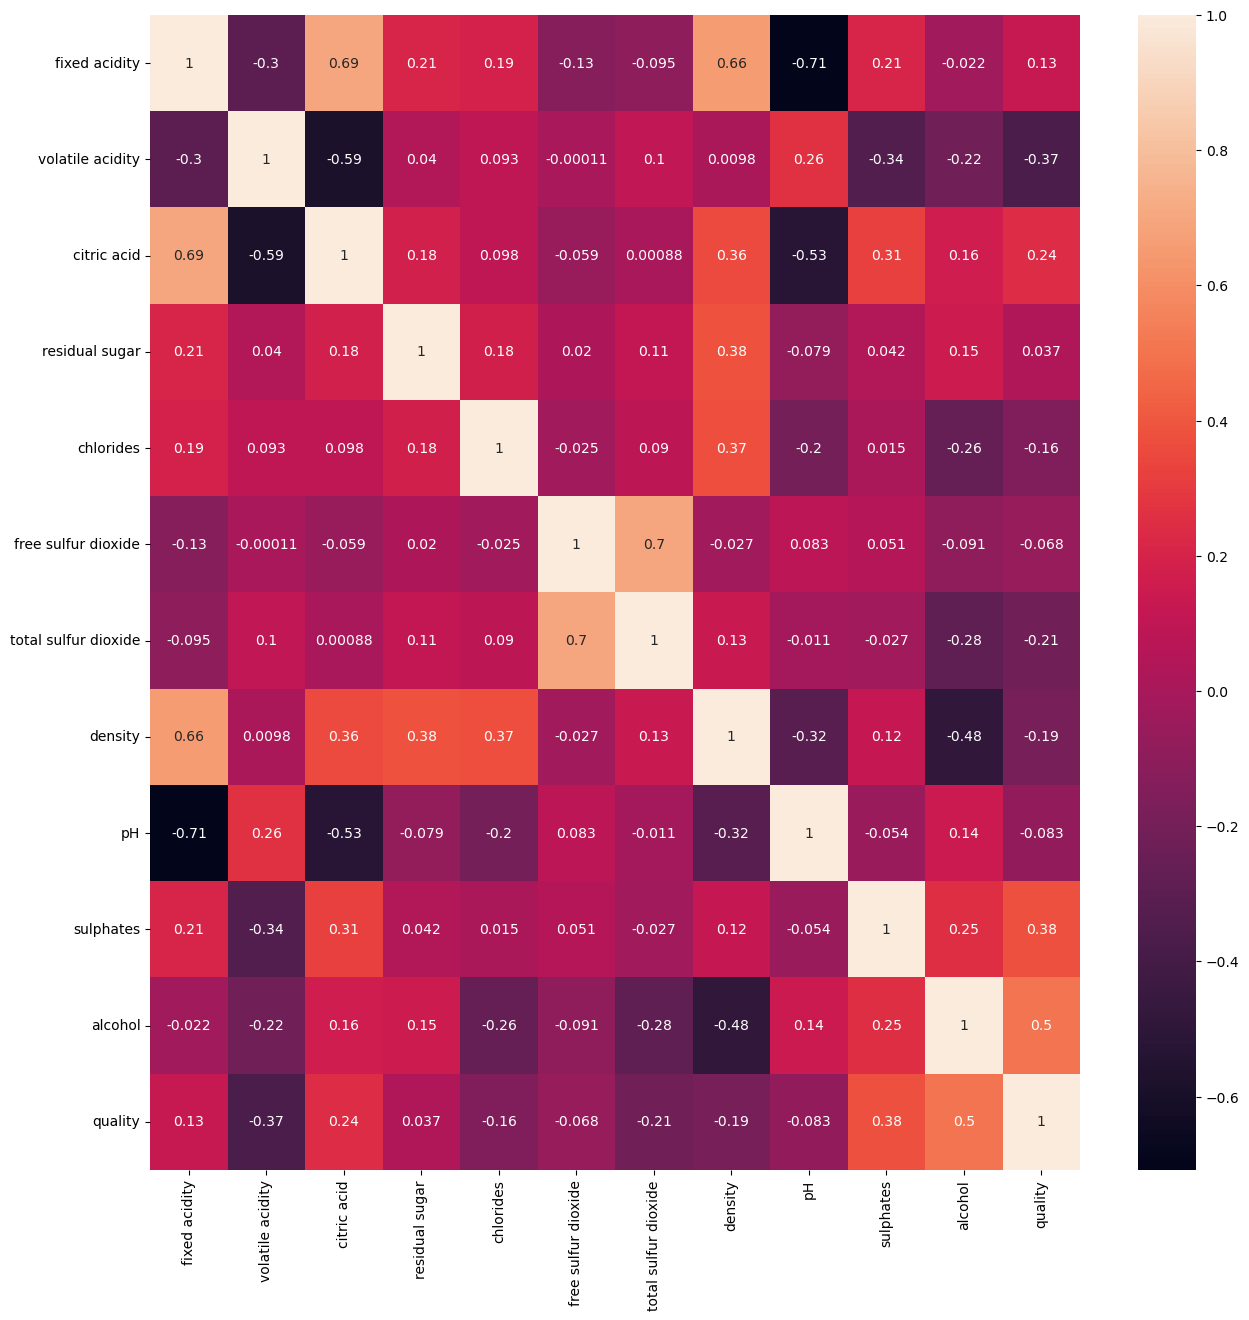

In [54]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation , annot = True)
plt.show()

here in correlation heatmap we can see  features like residual suagr , free sulphur dioxide ,pH have very less correlation with the target variable we will check correlation furthur with target variable with pvalues 

volatile acidity , chlorides , free sulphur dioxide, total sulphur dioxide , density , pH have negative correlation

alcohol, sulphates,citric acid ,residual suagr ,fixed acidity have positive correlation with target variable

some features like pH, citiric acid etc have moderate correlation with eachother 


##### --->creating a new column name wine_quality 

In [55]:
df['wine_quality']='0' #  0 for not good (for wine quality that is less than 7)
df.loc[df['quality'] >= 7, 'wine_quality'] = '1' # 1 for good quality wine with qaulity equals to or more than 7

In [56]:
df.wine_quality= df['wine_quality'].astype(int)


we created a new column named wine quality which has values only 0 and 1 based on quality of wine

### Seperating features and target variable

In [57]:
X= df.drop(['quality','wine_quality'], axis=1)
Y=df.wine_quality

### Using Pvalues for feature selection

In [58]:
from sklearn.feature_selection import SelectPercentile,chi2

In [59]:
Spercentile = SelectPercentile(score_func = chi2)
Spercentile = Spercentile.fit(X,Y)
scores_1 = pd.DataFrame({'features': X.columns, 'chi2score': Spercentile.scores_, 'p_values': Spercentile.pvalues_})
scores_1.sort_values('chi2score', ascending = False)

,features,chi2score,p_values
5,free sulfur dioxide,56.407712,5.889891e-14
6,total sulfur dioxide,29.796266,4.799154e-08
10,alcohol,23.588306,1.193104e-06
2,citric acid,7.653539,5.666107e-03
0,fixed acidity,5.992946,1.436320e-02
1,volatile acidity,4.975322,2.571141e-02
9,sulphates,3.129209,7.690107e-02
3,residual sugar,0.083177,7.730379e-01
8,pH,0.043826,8.341781e-01
4,chlorides,0.026878,8.697740e-01


After analyzing the last four featuresi.e (residual sugar,pH,chlorides,density), including their bar plots and correlations with the target variable, we found weak associations with wine quality. The high p-values indicated that these features had limited statistical significance.

Nevertheless, upon closer examination, we noticed a slight improvement in wine quality with decreasing chloride levels and a minimal positive correlation with decreasing pH levels. Based on these observations, we decided to drop 'density' and 'residual sugar' from the analysis, as their impact on wine quality seemed negligible in our dataset.

In [60]:
X = X.drop(['residual sugar','density'], axis=1)

### Scaling using Standard Scalar

In [61]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,-0.549327,1.009464,-1.392862,-0.193114,-0.446214,-0.217278,1.394315,-0.631624,-0.984429
1,-0.306878,2.050338,-1.392862,0.856781,1.052631,0.879697,-0.806846,0.292777,-0.599091
2,-0.306878,1.356422,-1.183521,0.591706,-0.017973,0.489772,-0.380815,0.061676,-0.599091
3,1.753944,-1.419242,1.537914,-0.246603,0.196148,0.674976,-1.090867,-0.477557,-0.599091
4,-0.549327,0.778159,-1.392862,-0.246603,-0.232094,0.012704,1.394315,-0.631624,-0.984429
...,...,...,...,...,...,...,...,...,...
1234,-0.913002,0.546853,-0.974180,-0.638631,1.373812,-0.061910,0.755268,1.371244,-0.888094
1235,-1.276676,0.431201,-0.974180,0.500143,1.802053,0.156533,0.968284,-0.477557,0.075251
1236,-1.458514,0.142069,-0.869509,-1.002409,2.551475,0.393306,1.465320,0.909044,0.749592
1237,-1.458514,0.691419,-0.764839,-0.246603,1.802053,0.156533,1.820346,0.523877,-0.213753


### -- checking variance inflation factor

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif
                                                                         

,VIF values,Features
0,3.133952,fixed acidity
1,1.798430,volatile acidity
2,3.103619,citric acid
3,1.148898,chlorides
4,2.115250,free sulfur dioxide
5,2.361003,total sulfur dioxide
6,2.183994,pH
7,1.243470,sulphates
8,1.358990,alcohol


we can conclude by seeing the variance inflation factor that we do not have the problerm of multicollinearity

## Oversampling 
 for making the data balanced

In [63]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(X,Y)

In [64]:
y1.value_counts()

0    1070
1    1070
Name: wine_quality, dtype: int64

## Creating train test Split

In [65]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (x1,y1, test_size = 0.25 , random_state = i)

#### importing necessary libraries for models

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

## Models

#### AdaBoost Classifier

In [67]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8884735202492212


In [68]:
y_pred_testABC  = abc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testABC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.8822429906542056


In [69]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testABC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       272
           1       0.86      0.91      0.88       263

    accuracy                           0.88       535
   macro avg       0.88      0.88      0.88       535
weighted avg       0.88      0.88      0.88       535



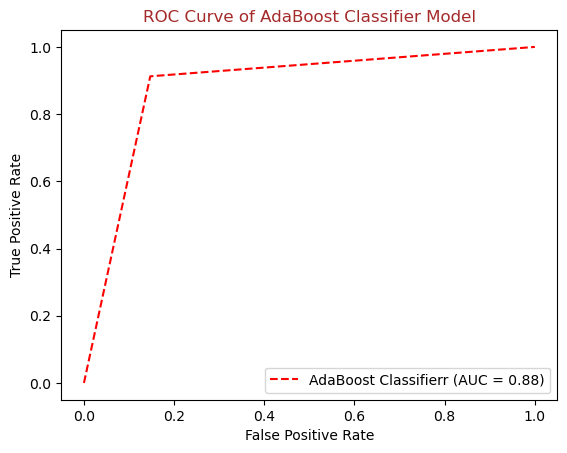

 Here we can area under the curve is --> 0.8827443524938493


In [70]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testABC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="AdaBoost Classifierr") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of AdaBoost Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### RandomForest Classifier 

In [71]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [72]:
y_pred_testRFC  = rfc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9345794392523364


In [73]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testRFC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       272
           1       0.90      0.97      0.94       263

    accuracy                           0.93       535
   macro avg       0.94      0.94      0.93       535
weighted avg       0.94      0.93      0.93       535



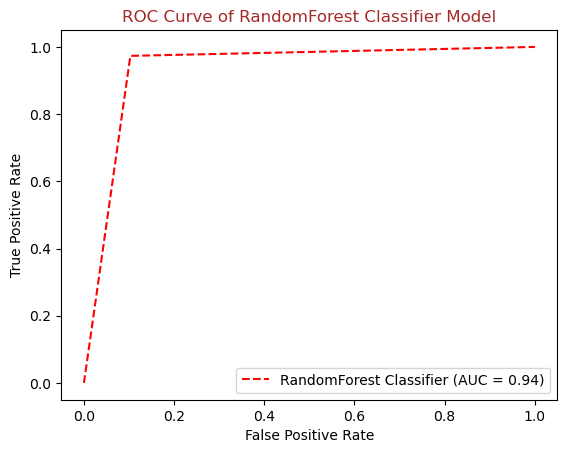

 Here we can area under the curve is --> 0.9352214269738314


In [74]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testRFC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="RandomForest Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of RandomForest Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### Logistic Regression

In [75]:
log_R =LogisticRegression()
log_R.fit(X_train, Y_train)
y_pred = log_R.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8267912772585669


In [76]:
y_pred_testLR  = log_R.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testLR ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8261682242990654


In [77]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testLR))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.85      0.81      0.82       272
           1       0.81      0.85      0.83       263

    accuracy                           0.83       535
   macro avg       0.83      0.83      0.83       535
weighted avg       0.83      0.83      0.83       535



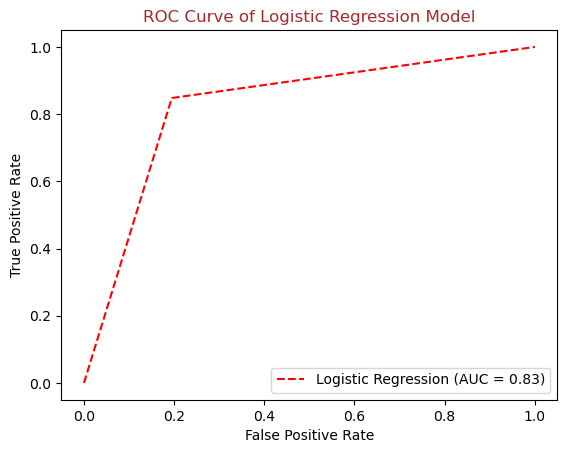

 Here we can area under the curve is --> 0.826527902035339


In [78]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testLR)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="Logistic Regression") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Logistic Regression Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### SVC

In [79]:
SVM = SVC()
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8940809968847352


In [80]:
y_pred_testSVM  = SVM.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testSVM ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8859813084112149


In [81]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testSVM))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       272
           1       0.85      0.93      0.89       263

    accuracy                           0.89       535
   macro avg       0.89      0.89      0.89       535
weighted avg       0.89      0.89      0.89       535



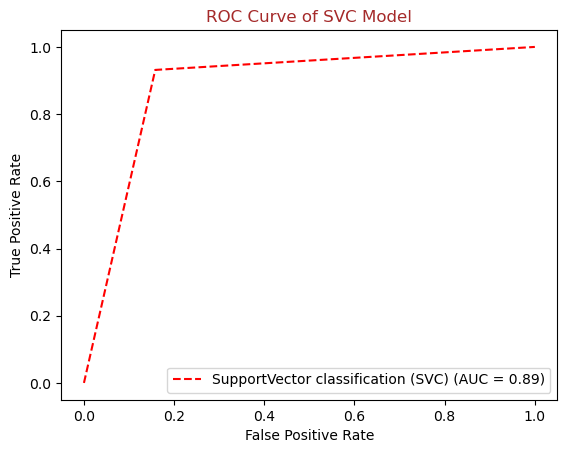

 Here we can area under the curve is --> 0.8867353500335495


In [82]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testSVM)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="SupportVector classification (SVC)") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of SVC Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### GradientBoosting Classifier

In [83]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.950778816199377


In [84]:
y_pred_testGBC  = GBC.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testGBC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9065420560747663


In [85]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testGBC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       272
           1       0.87      0.96      0.91       263

    accuracy                           0.91       535
   macro avg       0.91      0.91      0.91       535
weighted avg       0.91      0.91      0.91       535



In [86]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_testGBC)
roc_auc = roc_auc_score(Y_test, y_pred_testGBC)
fpr, tpr, _ = roc_curve(Y_test, y_pred_testGBC)
print(roc_auc)

0.9073962760008947


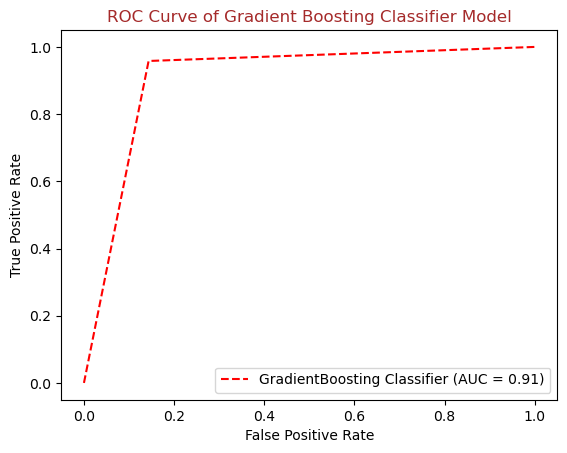

 Here we can area under the curve is --> 0.9073962760008947


In [87]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testGBC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="GradientBoosting Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Gradient Boosting Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### KNN

In [88]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9152647975077881


In [89]:
y_pred_testKNN  = KNN.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testKNN ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8728971962616823


In [90]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testKNN))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.97      0.77      0.86       272
           1       0.81      0.98      0.88       263

    accuracy                           0.87       535
   macro avg       0.89      0.87      0.87       535
weighted avg       0.89      0.87      0.87       535



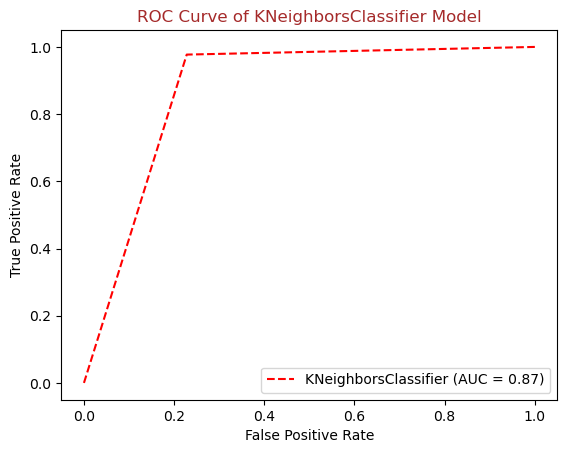

 Here we can area under the curve is --> 0.8746225676582421


In [91]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testKNN)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="KNeighborsClassifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of KNeighborsClassifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

we will further understand which model is best predicting by using cross validation 

## Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score

In [109]:
cscore1 = cross_val_score(rfc,x1,y1)
print('Cscore for RandomForest Classifier-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testRFC)-cscore1.mean())

Cscore for RandomForest Classifier->  [0.92523364 0.89485981 0.94392523 0.87383178 0.9088785 ]
mean of cscore->  0.9093457943925234
difference between accuracy and cross validation score is 0.012149532710280297


In [94]:
cscore2 = cross_val_score(KNN,x1,y1)
print('Cscore for Kneighbours Classifier ',cscore2)
print('mean of cscore-> ',cscore2.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testKNN)-cscore2.mean())

Cscore for Kneighbours Classifier  [0.9182243  0.81074766 0.89953271 0.79672897 0.85514019]
mean of cscore->  0.8560747663551401
difference between accuracy and cross validation score is 0.016822429906542147


In [95]:
cscore3 = cross_val_score(abc,x1,y1)
print('Cscore for AdaBoost Classifier-> ',cscore3)
print('mean of cscore-> ',cscore3.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testABC)-cscore3.mean())

Cscore for AdaBoost Classifier->  [0.86448598 0.84813084 0.89953271 0.80373832 0.83878505]
mean of cscore->  0.8509345794392523
difference between accuracy and cross validation score is 0.03130841121495331


In [96]:
cscore4 = cross_val_score(GBC,x1,y1)
print('Cscore for Gradient Boost Classifier -> ',cscore4)
print('mean of cscore-> ',cscore4.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testGBC)-cscore4.mean())

Cscore for Gradient Boost Classifier ->  [0.90186916 0.85981308 0.92523364 0.83878505 0.88084112]
mean of cscore->  0.8813084112149532
difference between accuracy and cross validation score is 0.025233644859813165


In [97]:
cscore5 = cross_val_score(SVM,x1,y1)
print('Cscore for SUpport Vector Machine-> ',cscore5)
print('mean of cscore-> ',cscore5.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testSVM)-cscore5.mean())

Cscore for SUpport Vector Machine->  [0.91588785 0.82242991 0.90420561 0.80841121 0.87383178]
mean of cscore->  0.8649532710280374
difference between accuracy and cross validation score is 0.02102803738317749


In [98]:
cscore6 = cross_val_score(log_R,x1,y1)
print('Cscore for Logistic Regression',cscore6)
print('mean of cscore-> ',cscore6.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testLR)-cscore6.mean())

Cscore for Logistic Regression [0.88551402 0.77102804 0.87616822 0.71495327 0.81308411]
mean of cscore->  0.8121495327102803
difference between accuracy and cross validation score is 0.014018691588785104


##### after analysing cross value score we can conclude RandomForest classifier accuracy is good i.e. 90.9% with least deviation of only 1.21% so we choose Random Forest Classifier

## Hyper parameter tuning

In [99]:
rfc.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [100]:
# Choosing parameters for our grid search CV
parameters = { 'criterion': ["gini", "entropy", "log_loss"],
               'max_depth': [None, 10, 20, 30],  # Adjusted max_depth values
               'n_jobs': [-1, 2, None],
               'n_estimators': [100, 200, 300],
               'min_samples_split': [2, 5, 10],
               }



In [101]:
GSC = GridSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [102]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [-1, 2, None]})

In [103]:
GSC.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': 2}

In [104]:
rfc_final = RandomForestClassifier(criterion='entropy', max_depth= 30, n_estimators = 100, n_jobs = -1 , min_samples_split= 2 )
rfc_final.fit(X_train, Y_train)
y_pred = rfc_final.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [105]:
y_pred_testRFC  = rfc_final.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.9214953271028037


our model accuracdy increased from 90.9% to 92.14%

## Model Saving

In [106]:
import joblib
joblib.dump(rfc_final,'model for estimating red wine quality')

['model for estimating red wine quality']

# Prediction 

In [107]:
mymodel = joblib.load('model for estimating red wine quality')
prdt = mymodel.predict(X_test)
prdt

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,

In [108]:
Orginal = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':Orginal})
data1

,predicted,original
0,1,1
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
530,1,1
531,1,1
532,0,0
533,1,1


--we can see the prediction based on the model we build